<a href="https://colab.research.google.com/github/nehal35/-Online-Retail-Customer-Segmentation---Capstone-Project/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [176]:
# Importing common libraries
import numpy as np #for handling arrays
import pandas as pd #for data manipulation, read_excel
from numpy import math

%matplotlib inline
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns; sns.set()
import seaborn as sns #for better visualizations

from datetime import datetime
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
file_path='/content/drive/MyDrive/ Online Retail Customer Segmentation - Capstone Project/Copy of Online Retail.xlsx'

In [179]:
df=pd.read_excel(file_path,)



In [180]:
# checking shape of dataframe
df.shape

(541909, 8)

### **Shape of our dataset is (541909, 8) that means we have 541909 number of rows and 8 columns**

# **Data Inspection**

In [181]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# **Data Wrangling:**

In [182]:
# checking the datatype and null values in dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# **Observations**
* **'Datetype of InvoiceDate is object need to convert it into datetime"**
* **"if invoiceNo starts with C means it's a cancellation. We need to drop this entries"**
* **"There are null values in CustomerID and Description"**

In [183]:
# let's check the null values count.
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

Text(0.5, 1.0, 'visualizing Missing Values')

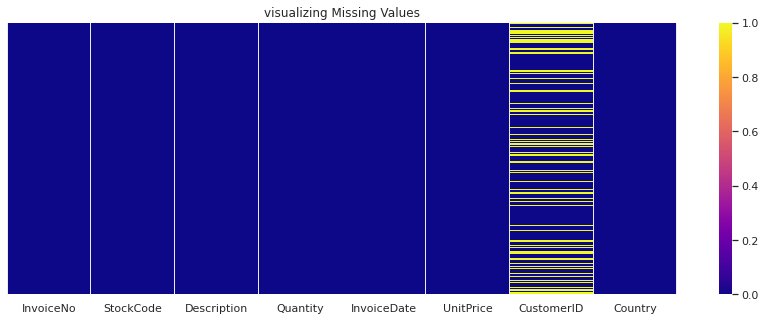

In [184]:
# visualaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title("visualizing Missing Values")

# **Observations**
* **Missing values in CustomerID and Description columns.**
* **CustomerID is our identification feature so if its missing means other wont help us in analysis**
* **Dropping that all missing datapoints**

In [185]:
#To check distribution describing dataset
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [186]:
# figuring data types
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

In [187]:
# categorical columns
categorical_columns=list(df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)

In [188]:
# find unique values of categorical column
def unique_name_no(col):
  print(df[col].unique())
  print(df[col].nunique())


for i in categorical_columns:
  print(i.upper())
  unique_name_no(i)

INVOICENO
[536365 536366 536367 ... 581585 581586 581587]
25900
STOCKCODE
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
4070
DESCRIPTION
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
4223
COUNTRY
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']
38


In [189]:
# duplicate
len(df[df.duplicated()])

5268

In [190]:
# Dropping Duplicate Rows
df=df.drop_duplicates()
len(df[df.duplicated()])

0

**Dataset after removing duplicate values.**

In [191]:
df.shape

(536641, 8)

In [192]:
#checking null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

# **Missing Value Imputation**

In [193]:
#dropping missing values
df.dropna(inplace=True)

In [194]:
#checking null values again
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Now we cleaned null values**

In [195]:
#records remaining after removing null values
df.shape

(401604, 8)

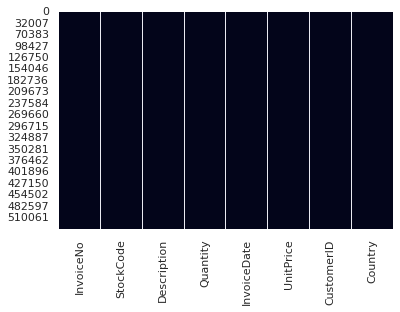

In [196]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


## **After removing null and duplicate values in our dataset. It reduces to (401604, 8)**

In [198]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


* **'Here we can see that min value for quantity column is negative'**
* **"Uniteprice has 0 as min value"**
* **Need to Explore thes columns'**

In [199]:
# dataframe have negative values in quantity 
# here we observed  that Invoice number starting with C has negative values and as per description of the data those are cancelations. so we need to drop this entries.
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [200]:
# changing the datatype to str
df['InvoiceNo']=df['InvoiceNo'].astype('str')

In [201]:
# also If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.
df=df[~df['InvoiceNo'].str.contains('C')]

In [202]:

# Checking how many values are present for unitprice==0
# almost 40 values are present so will drop this values
len(df[df['UnitPrice']==0])


40

In [203]:
# taking unitprice values greater than 0.
df=df[df['UnitPrice']>0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [204]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [205]:
df.shape

(392692, 8)

# **EDA(Exploratory Data Analysis)**

In [206]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

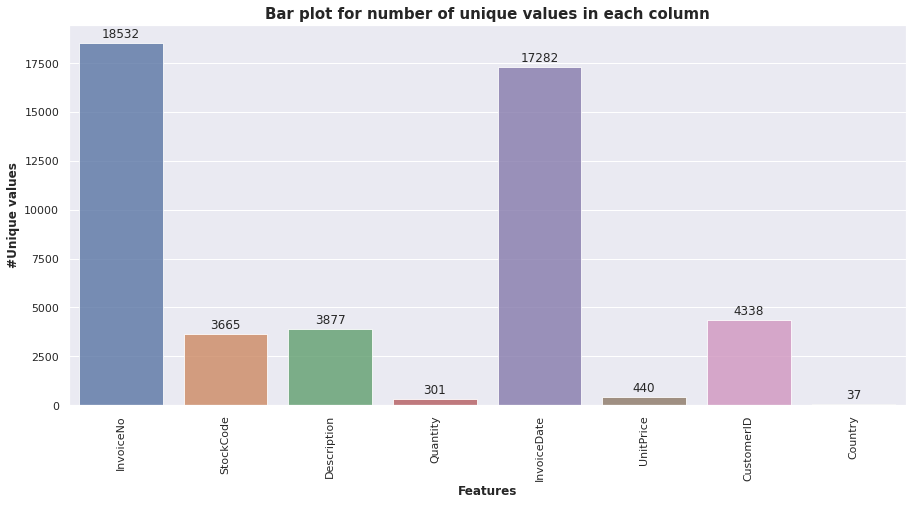

In [207]:
#Counting unique value of features
unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

**Higher no. of Invoice No is justificable here as it represents no. of transections.**

In [208]:
# Counting unique value of Description name as higher count comes first
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


In [209]:
#least count of description name
Description_df.tail()

,Description_Name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


**Top 5 items in terms of description(Name)**


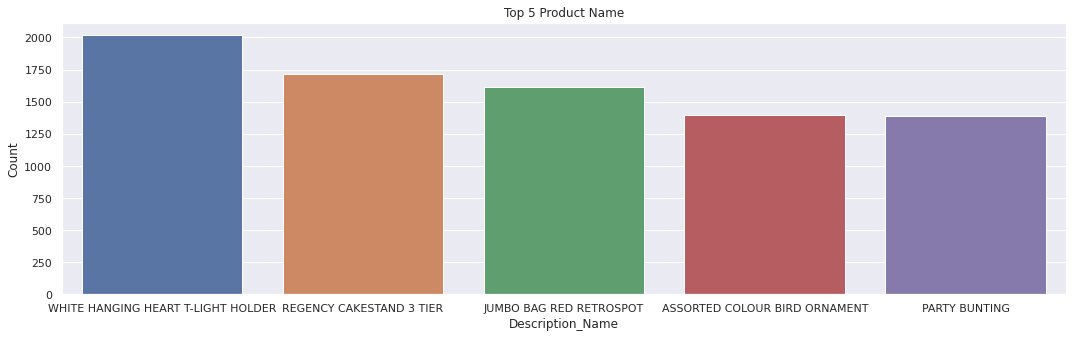

In [210]:
#visualization of count of description name
plt.figure(figsize=(18,5))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

**Observations**
* **WHITE HANGING HEART T-LIGHT HOLDER is the highest selling product almost 2018 units were sold**
* **"REGENCY CAKESTAND 3 TIER is the 2nd highest selling product almost 1723 units were sold"**

# **Bottom 5 items in terms of description(Name)**

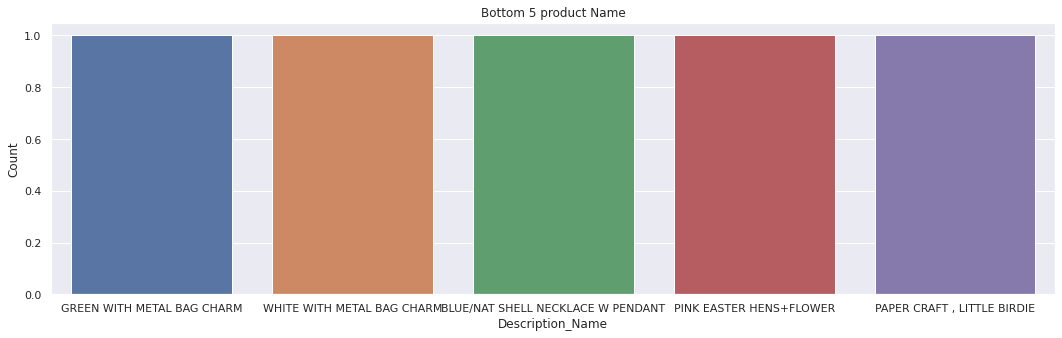

In [211]:
#visualization of tail of description name
plt.figure(figsize=(18,5))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])


**Top 5 items in terms of Stockcode**

In [212]:
#count of stockcode_name as higher count comes first
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2023
1,22423,1713
2,85099B,1615
3,84879,1395
4,47566,1389


In [213]:
#count of stockcode from last
StockCode_df.tail()

,StockCode_Name,Count
3660,90059A,1
3661,20678,1
3662,90059D,1
3663,90168,1
3664,23843,1


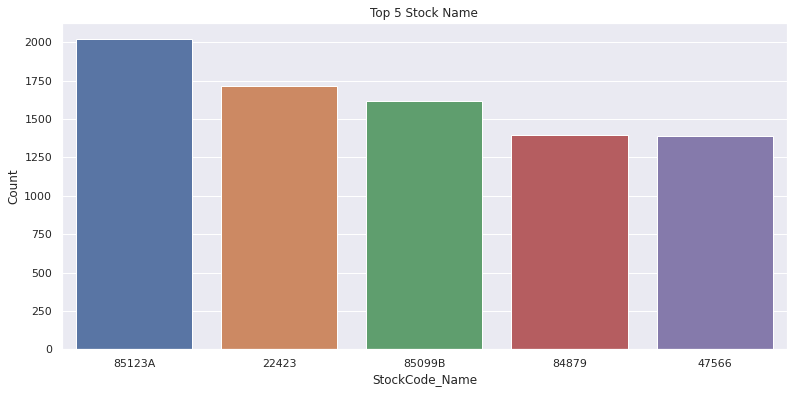

In [214]:
# top 5 product in terms of StockCode
#visualization of count of stock name
plt.figure(figsize=(13,6))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

**Observations**
* **StockCode-85123Ais the first highest selling product.**
* **StockCode-22423 is the 2nd highest selling product.**

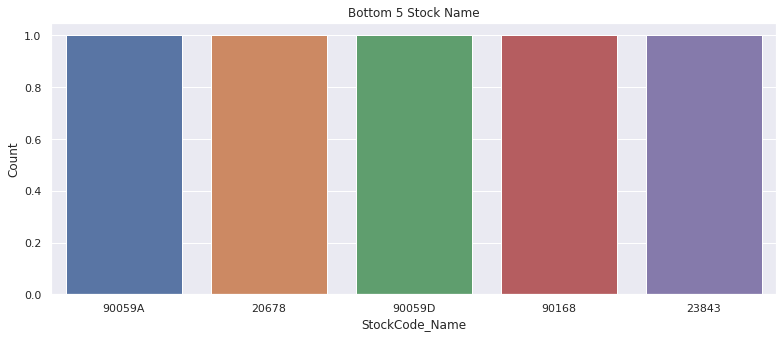

In [215]:
#visualization
plt.figure(figsize=(13,5))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[-5:])

In [216]:
# Counting unique value of country_name as higher count comes first
country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


In [217]:
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


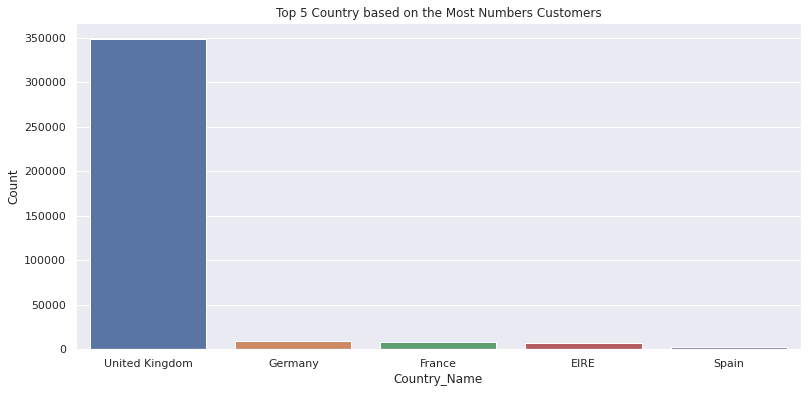

In [218]:
#visualization of 'Top 5 Country based Most Numbers of  Customers'
plt.figure(figsize=(13,6))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])

# **Observation**
* ## **UK has highest number of customers**
* ## **Germany,France and IreLand has almost equal number of customers**

Text(0.5, 1.0, 'Top 5 Countries based on least number of customers ')

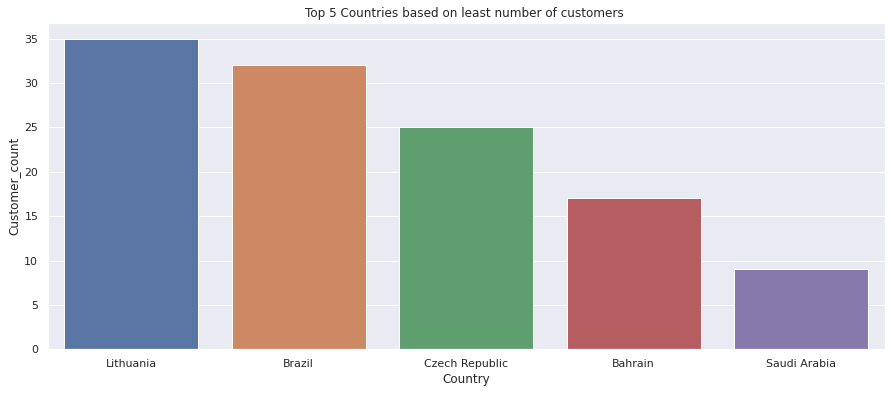

In [219]:
# Top 5 Countries based on least number of customers
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].tail(5),y=top_5_countries['Customer_count'].tail(5))
plt.title('Top 5 Countries based on least number of customers ')

**Observations**
* **There are very less customers from Saudi Arabia**
* **Bahrain is the 2nd Country having least number of customers**

In [220]:
#exploring 'Saudi Arabia'
df[df['Country']=='Saudi Arabia']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
100810,544838,22915,ASSORTED BOTTLE TOP MAGNETS,12,2011-02-24 10:34:00,0.42,12565.0,Saudi Arabia
100811,544838,22363,GLASS JAR MARMALADE,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia
100812,544838,22362,GLASS JAR PEACOCK BATH SALTS,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia
100813,544838,22361,GLASS JAR DAISY FRESH COTTON WOOL,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia
100814,544838,22553,PLASTERS IN TIN SKULLS,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia
100815,544838,22555,PLASTERS IN TIN STRONGMAN,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia
100816,544838,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia
100817,544838,20781,GOLD EAR MUFF HEADPHONES,2,2011-02-24 10:34:00,5.49,12565.0,Saudi Arabia
100818,544838,22969,HOMEMADE JAM SCENTED CANDLES,12,2011-02-24 10:34:00,1.45,12565.0,Saudi Arabia


* **Positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.hear mean>median>mode**
* **Negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.hear mean**
* **For symmetric graph mean=median=mode**

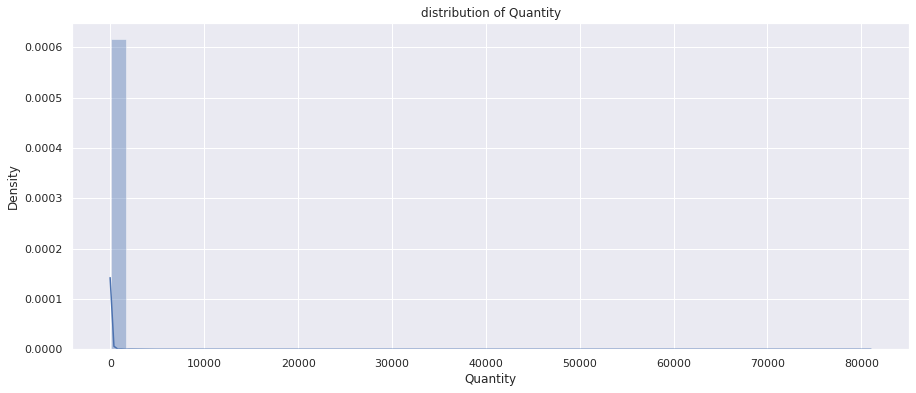

In [221]:
#distribution of Quantity
plt.figure(figsize=(15,6))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="B")

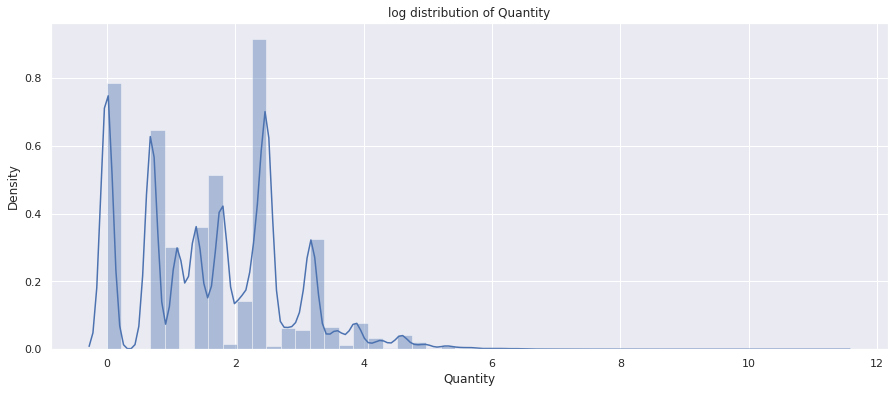

In [222]:
#applying log distribution on quantity
plt.figure(figsize=(15,6))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

In [223]:
#unique values of Quantity
df['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    19,    39,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,   208,  1008,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   186,   114,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    33,

In [225]:
#Checking Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


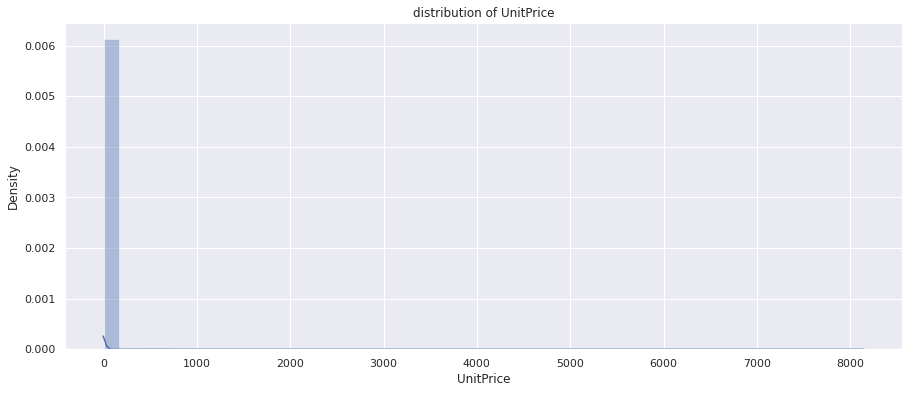

In [226]:
#visualizing distribution of unit price
plt.figure(figsize=(15,6))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color="B")

In [227]:
#checking records where unit price is less than 0
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [229]:
#keeping only records having unit price more than 0
df=df[df['UnitPrice']>0]

In [230]:
#checking dataset
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#**Feature engineering**

In [231]:
#extracting Invoice Date
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

### **Convert InvoiceDate columns into date time format**

In [232]:
#getting Day as feature
df['Day']=df['InvoiceDate'].dt.day_name()

### **Create a new features Day from Invoicedate**

In [233]:
# Create some new features from Invoicedate like hours,year,month_num,day_num
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [234]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month_num,day_num,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26


### **Create some new features from Invoicedate like hours, year, month_num, day_num**

In [235]:
#creating new feature (TotalAmount)
df['TotalAmount']=df['Quantity']*df['UnitPrice']

### **Create a new features TotalAmount from product of Quantity and Unitprice**

In [236]:
# adding month name feature from Invoice Date feature
df['Month']=df['InvoiceDate'].dt.month_name()

In [237]:
#checking changes
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month_num,day_num,hour,minute,TotalAmount,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,December


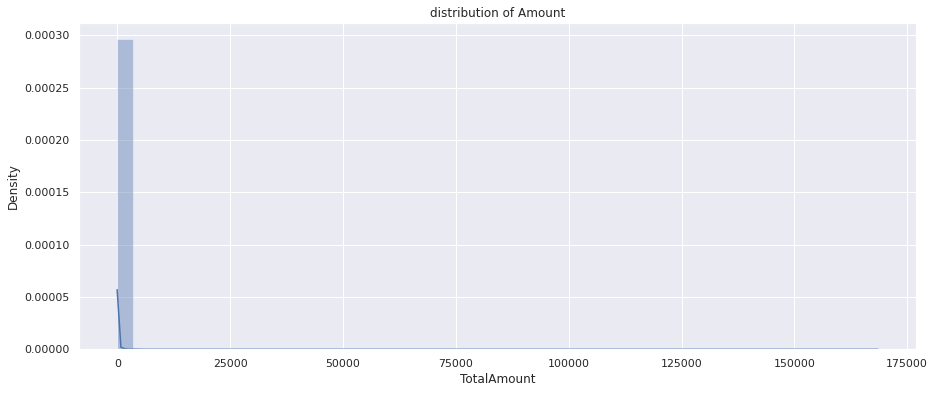

In [238]:
#checking distribution of Total amount
plt.figure(figsize=(15,6))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="B")

In [239]:
#get more clear view of Total Amount
df['TotalAmount'].describe()

count    392692.000000
mean         22.631500
std         311.099224
min           0.001000
25%           4.950000
50%          12.450000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

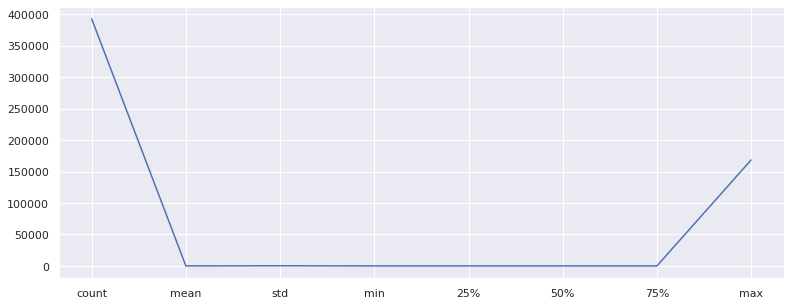

In [240]:
#visualizing Total amount
plt.figure(figsize=(13,5))
df['TotalAmount'].describe().plot()

In [38]:
sales_in_month=retail_df['month'].value_counts().reset_index().rename(columns={'index':'Month','month':'Sales_count'})
sales_in_month

,Month,Sales_count
0,November,64531
1,October,49554
2,December,43461
3,September,40028
4,May,28320
5,June,27185
6,March,27175
7,August,27007
8,July,26825
9,April,22642


Text(0.5, 1.0, 'Sales count in different Months ')

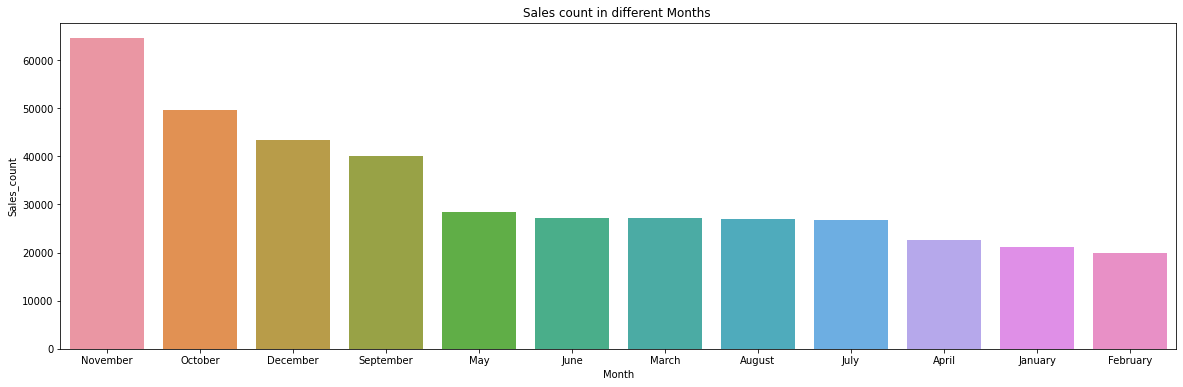

In [39]:
# Sales count in different months.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different Months ')


**Observations**
* **Most of the sale happened in Novmenber month.**
* **February Month had least sales.**

In [40]:

sales_on_day_basis=retail_df['Day'].value_counts().reset_index().rename(columns={'index':'Day',"Day":'Sale_count'})
sales_on_day_basis

,Day,Sale_count
0,Thursday,80035
1,Wednesday,68885
2,Tuesday,66473
3,Monday,64893
4,Sunday,62773
5,Friday,54825


Text(0.5, 1.0, 'Sales count on different Days ')

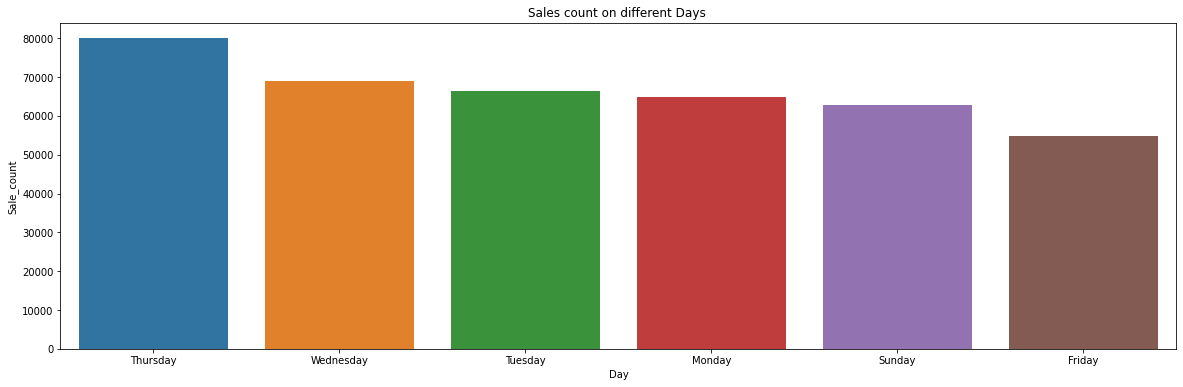

In [41]:
# Sales count on different days.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['Sale_count'])
plt.title('Sales count on different Days ')

# **Observation**
* **Sales On Thursdays are very high.**
* **Sales On Fridays are very less **

In [42]:
retail_df['hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

In [43]:
def time(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [44]:
retail_df['Day_time_type']=retail_df['hour'].apply(time)

In [45]:
sales_timing=retail_df['Day_time_type'].value_counts().reset_index().rename(columns={'index':'Day_time_type','Day_time_type':'Sales_count'})
sales_timing


,Day_time_type,Sales_count
0,Afternoon,272738
1,Morning,118095
2,Evening,7051


Text(0.5, 1.0, 'Sales count in different day timings')

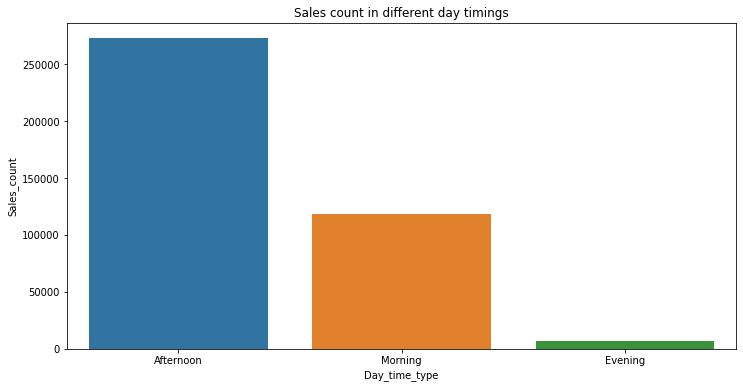

In [46]:
# sales count on different days.
plt.figure(figsize=(12,6))
sns.barplot(x=sales_timing['Day_time_type'],y=sales_timing['Sales_count'])
plt.title('Sales count in different day timings')

**Observations**
* **Most of the sales happens in the afternoon.**
* **Least sales happens in the evening.** 

In [47]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'month', 'Day', 'TotalAmount', 'Day_time_type'],
      dtype='object')

In [48]:
avg_amount=retail_df.groupby('CustomerID')['TotalAmount'].mean().reset_index().rename(columns={'TotalAmount':'Avg_amount_per_customer'}).sort_values('Avg_amount_per_customer',ascending=False)

avg_amount

,CustomerID,Avg_amount_per_customer
0,12346.0,77183.600000
3008,16446.0,56157.500000
2011,15098.0,13305.500000
2502,15749.0,4453.430000
2087,15195.0,3861.000000
...,...,...
3590,17254.0,2.432500
697,13271.0,2.264375
990,13684.0,2.241000
3995,17816.0,2.150588


Text(0.5, 1.0, 'Average amount spent by each Customer')

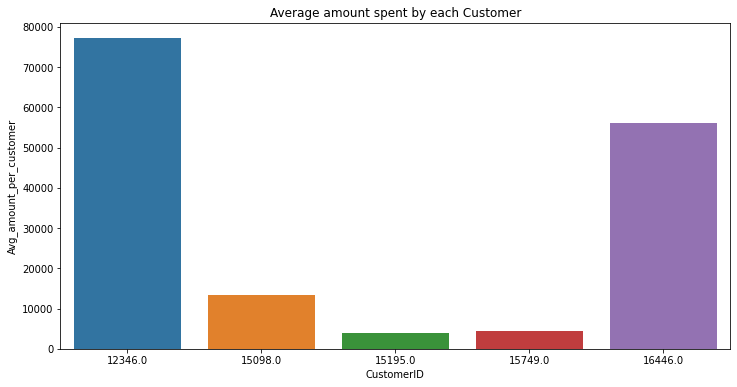

In [49]:

# Sales count on different days.
plt.figure(figsize=(12,6))
sns.barplot(x=avg_amount['CustomerID'].head(5),y=avg_amount['Avg_amount_per_customer'].head(15))
plt.title('Average amount spent by each Customer')


**Observation**
* **77183 (Dollars)is the highest average amount spent by the CustomerID-12346**
* **56157 (Dollars) is the 2nd highest average amount spent by the CustomerID-16446**

# **RFM MODEL ANALYSIS:**

# **What is RFM?**
* **'RFM is a method used to analyse customer value.RFM stands for RECENCY, Frequency, and Monetary.**
* **RECENCY: How recently did the customer visit our website or how recently did a customer purchase?**

* **Frequency: How often do they visit or how often do they purchase?**

* **Monetary: How much revenue we get from their visit or how much do they spend when they purchase?**

# **Why it is Needed?**
* **RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above three factors RECENCY, Frequency, and Monetary.**

* **The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.**

In [50]:
rfm_dataframe=retail_df.copy()

In [51]:
rfm_dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,month,Day,TotalAmount,Day_time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34,Morning


In [52]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

# Adding 1 day to the Last Invoice date to set as Latest date for reference
Latest_Date = retail_df["InvoiceDate"].max() + pd.DateOffset(days=1)

#Create RFM Modelling scores for each customer
rfm_dataframe = retail_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_dataframe['InvoiceDate'] = rfm_dataframe['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_dataframe.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_dataframe.reset_index().head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


**Interpretation:**

Recency: How recent a customer made a purchase.\
Frequency: How often a customer makes a purchase.\
Monetary: How much money a customer spends.

In [53]:
# Description Stats=Recency
rfm_dataframe.Recency.describe()

count    4338.000000
mean       92.536422
std       100.014169
min         1.000000
25%        18.000000
50%        51.000000
75%       142.000000
max       374.000000
Name: Recency, dtype: float64

Text(0.5, 1.0, 'Distribution of Recency')

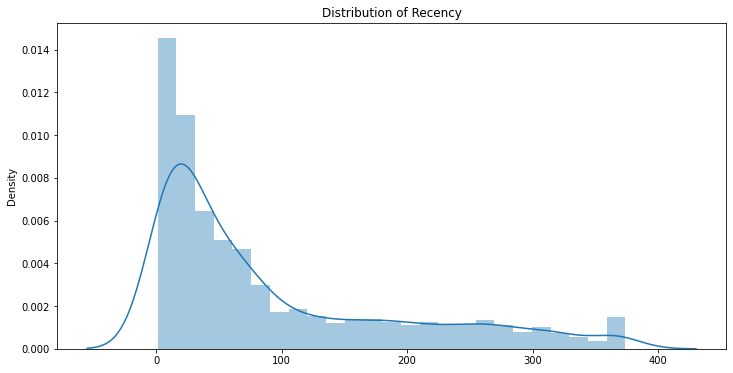

In [54]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Recency'])
plt.title('Distribution of Recency')

* **Distribution of Recency is right skewed.** 

In [55]:
# descriptive stats=Frequency
rfm_dataframe['Frequency'].describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

Text(0.5, 1.0, 'Distribution of frequency')

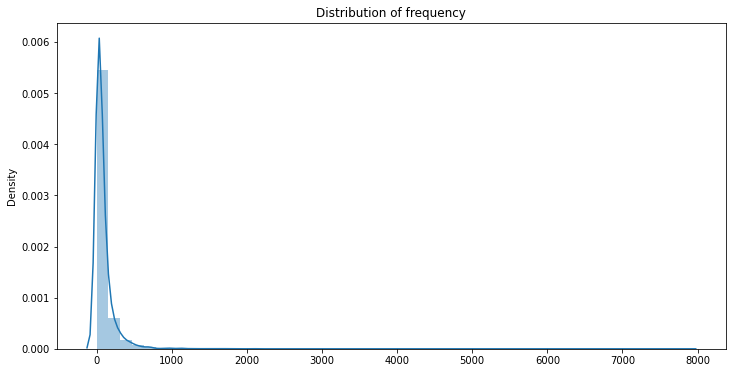

In [56]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Frequency'])
plt.title('Distribution of frequency')

* **Distribution of Frequency is highly right skewed.**

In [57]:
# Descriptive Stats=Monetary
rfm_dataframe['Monetary'].describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64

Text(0.5, 1.0, 'Distribution of Monetary')

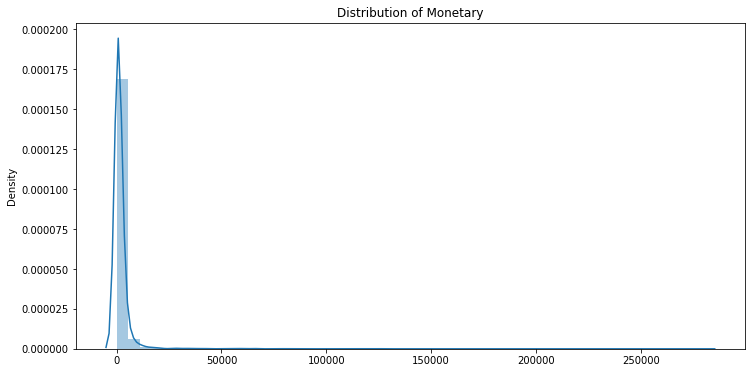

In [58]:

plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Monetary'])
plt.title('Distribution of Monetary')

* **Distribution of Monetary is highly right skewed.**

In [59]:
# split the data into four segment using quantile
quantile=rfm_dataframe.quantile(q=[0.25,0.50,0.75])

In [60]:
quantile=quantile.to_dict()

In [61]:
quantile

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [62]:
#Converting quantiles to a dictionary, easier to use.
#quantiles = quantiles.to_dict()
#Functions to create R, F and M segments
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# lower the recency, good for the company

 #Converting quantiles to a dictionary, easier to use.
#quantiles = quantiles.to_dict()
#Functions to create R, F and M segments
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# lower the recency, good for the company



def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1                               
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

        # arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
        # higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1


In [63]:
# Calculating and adding R,F and M segments values columns in the existing dataset to show R,F,M segment values
rfm_dataframe["R"] = rfm_dataframe['Recency'].apply(RScoring,args=('Recency',quantile,))
rfm_dataframe["F"] = rfm_dataframe['Frequency'].apply(FnMScoring,args=('Frequency',quantile,))
rfm_dataframe["M"] = rfm_dataframe['Monetary'].apply(FnMScoring,args=('Monetary',quantile,))
rfm_dataframe.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,19,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [64]:

# Add a new column to combine RFM score
rfm_dataframe['RFM_Group'] = rfm_dataframe.R.map(str)+rfm_dataframe.F.map(str)+rfm_dataframe.M.map(str)


     

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_dataframe['RFM_Score'] = rfm_dataframe[['R', 'F', 'M']].sum(axis = 1)
rfm_dataframe.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,19,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [65]:

rfm_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int64  
 1   Frequency  4338 non-null   int64  
 2   Monetary   4338 non-null   float64
 3   R          4338 non-null   int64  
 4   F          4338 non-null   int64  
 5   M          4338 non-null   int64  
 6   RFM_Group  4338 non-null   object 
 7   RFM_Score  4338 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 305.0+ KB


In [66]:
rfm_dataframe['RFM_Score'].unique()

array([ 9,  3,  7,  5, 11, 12,  8,  4,  6, 10])

In [67]:

# Assign Loyelty Level to each customer
Loyalty_Level = ['Platinaum','Gold','Silver','Bronz']

Score_cut = pd.qcut(rfm_dataframe['RFM_Score'],q = 4,labels=Loyalty_Level)
rfm_dataframe['RFM_Loyalty_Level'] = Score_cut.values
rfm_dataframe.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,12346.0,326,1,77183.60,4,4,1,441,9,Silver
1,12347.0,2,182,4310.00,1,1,1,111,3,Platinaum
2,12348.0,75,31,1797.24,3,3,1,331,7,Gold
3,12349.0,19,73,1757.55,2,2,1,221,5,Platinaum
4,12350.0,310,17,334.40,4,4,3,443,11,Bronz


In [68]:
rfm_dataframe['RFM_Score'].unique()

array([ 9,  3,  7,  5, 11, 12,  8,  4,  6, 10])

In [69]:
# Validate the data For RFM group = 111
rfm_dataframe[rfm_dataframe['RFM_Group'] == '111'].sort_values("Monetary",ascending = False).reset_index().head(10)


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,14646.0,2,2076,280206.02,1,1,1,111,3,Platinaum
1,18102.0,1,431,259657.30,1,1,1,111,3,Platinaum
2,17450.0,8,337,194550.79,1,1,1,111,3,Platinaum
3,14911.0,1,5675,143825.06,1,1,1,111,3,Platinaum
4,14156.0,10,1400,117379.63,1,1,1,111,3,Platinaum
5,17511.0,3,963,91062.38,1,1,1,111,3,Platinaum
6,16684.0,4,277,66653.56,1,1,1,111,3,Platinaum
7,14096.0,4,5111,65164.79,1,1,1,111,3,Platinaum
8,13694.0,4,568,65039.62,1,1,1,111,3,Platinaum
9,15311.0,1,2379,60767.90,1,1,1,111,3,Platinaum


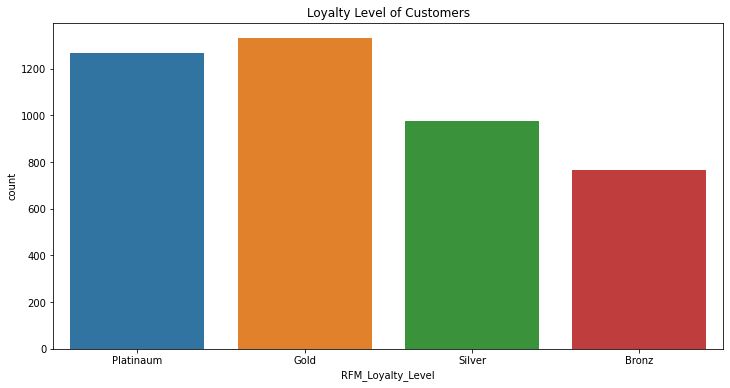

In [70]:
# Plot the loyelty level
plt.figure(figsize=(12,6))
sns.countplot(rfm_dataframe['RFM_Loyalty_Level'])
plt.title('Loyalty Level of Customers')
plt.show()

In [71]:

#Folowing table contains our target peoples
rfm_dataframe[rfm_dataframe['RFM_Loyalty_Level'] == 'Platinaum'].sort_values("Monetary",ascending = False).reset_index().head(10)


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,14646.0,2,2076,280206.02,1,1,1,111,3,Platinaum
1,18102.0,1,431,259657.30,1,1,1,111,3,Platinaum
2,17450.0,8,337,194550.79,1,1,1,111,3,Platinaum
3,14911.0,1,5675,143825.06,1,1,1,111,3,Platinaum
4,12415.0,24,714,124914.53,2,1,1,211,4,Platinaum
5,14156.0,10,1400,117379.63,1,1,1,111,3,Platinaum
6,17511.0,3,963,91062.38,1,1,1,111,3,Platinaum
7,16029.0,39,242,81024.84,2,1,1,211,4,Platinaum
8,16684.0,4,277,66653.56,1,1,1,111,3,Platinaum
9,14096.0,4,5111,65164.79,1,1,1,111,3,Platinaum


In [72]:
from pandas.core.frame import Frequency
segmentation_based_on_RFM=rfm_dataframe[['Recency','Frequency','Monetary','RFM_Loyalty_Level']]

In [73]:
segmentation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({'Recency':['mean','min','max'],
                                                            'Frequency': ['mean', 'min', 'max'],
                                                            'Monetary': ['mean', 'min', 'max','count']})

Recency            Frequency               Monetary  \
                         mean min  max        mean min   max         mean   
RFM_Loyalty_Level                                                           
Platinaum           19.916996   1  140  228.290909  20  7847  5248.510119   
Gold                63.758647   1  372   57.750376   1   543  1164.855971   
Silver             127.066598   1  374   24.501025   1    99   584.006426   
Bronz              218.268579  52  374   10.919166   1    41   199.209765   

                                            
                      min        max count  
RFM_Loyalty_Level                           
Platinaum          360.93  280206.02  1265  
Gold               114.34  168472.50  1330  
Silver               6.90   77183.60   976  
Bronz                3.75     660.00   767

In [74]:
from numpy.ma.extras import column_stack
# Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
  if num<=0:
    return 1
  else:
    return num
#apply handle_neg_n_zero function to recency and Monetary columns
rfm_dataframe['Recency']=[handle_neg_n_zero(x)for x in rfm_dataframe.Recency]
rfm_dataframe['Monetary']=[handle_neg_n_zero(x)for x in rfm_dataframe.Monetary]

In [75]:
# perform log transformation to bring data into normal or near normal distribution
Log_rfm_df=rfm_dataframe[['Recency','Frequency','Monetary']].apply(np.log, axis = 1).round(3)


* **Now let's Visualize the Distribution of Recency,Frequency and Monetary.**

Text(0.5, 1.0, 'Distributionn of Recency')

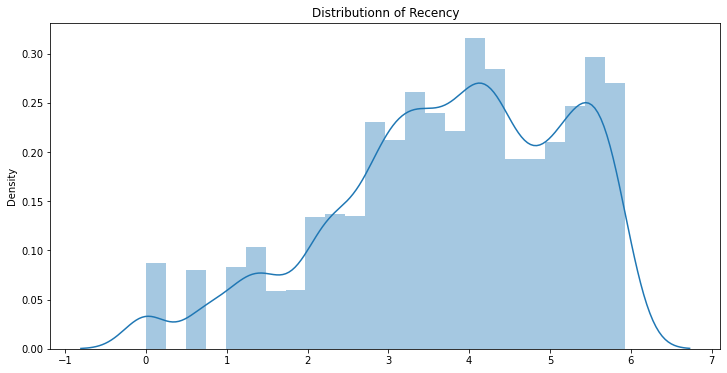

In [76]:
plt.figure (figsize=(12,6))
sns.distplot(x=Log_rfm_df['Recency'])
plt.title('Distributionn of Recency')

Text(0.5, 1.0, 'Distribution of Frequency')

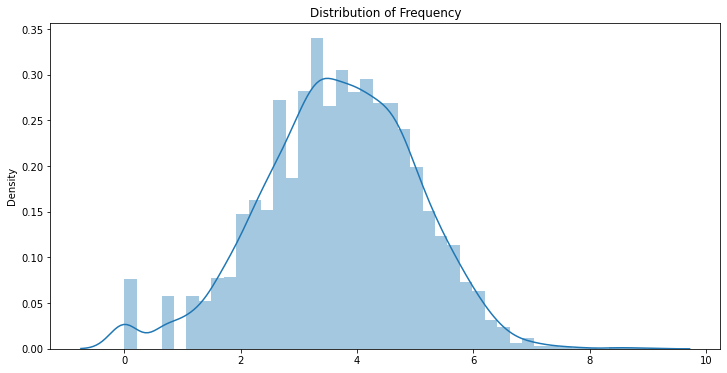

In [77]:

plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Frequency'])
plt.title('Distribution of Frequency')

Text(0.5, 1.0, 'Distribution of Monetary')

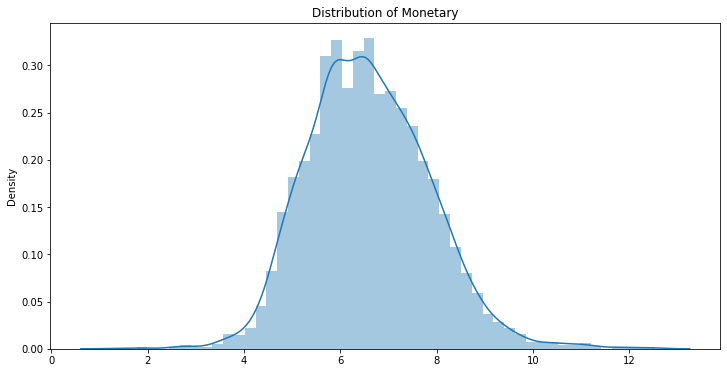

In [78]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Monetary'])
plt.title('Distribution of Monetary')


In [79]:
rfm_dataframe['Recency_log'] = rfm_dataframe['Recency'].apply(math.log)
rfm_dataframe['Frequency_log'] = rfm_dataframe['Frequency'].apply(math.log)
rfm_dataframe['Monetary_log'] = rfm_dataframe['Monetary'].apply(math.log)

In [80]:

rfm_dataframe

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,,,,,,,
12346.0,326,1,77183.60,4,4,1,441,9,Silver,5.786897,0.000000,11.253942
12347.0,2,182,4310.00,1,1,1,111,3,Platinaum,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007
12349.0,19,73,1757.55,2,2,1,221,5,Platinaum,2.944439,4.290459,7.471676
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,4,4,4,444,12,Bronz,5.627621,2.302585,5.196285
18281.0,181,7,80.82,4,4,4,444,12,Bronz,5.198497,1.945910,4.392224
18282.0,8,12,178.05,1,4,4,144,9,Silver,2.079442,2.484907,5.182064


# **1) KMeans Clustering:**

In [81]:

#Importing Libraries

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [82]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.**

## ---------------------------*Recency and Monetary.*-------------------------- 

**A) Applying Elbow Method on Recency and Monetary.**

In [85]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Monetary_log']
# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].Values
# standerdising the data
scalar=StandardScaler()
X=scalar.fit_transform
# applying Elbow Method
wcss={}
for k in range(1,15):
  km=KMeans(n_clusters=k,init='k-means++',max_iter=1000)
  km=km.fit(X)
  wcss[k]=km.inertia_

# plot the graph for the sum of square distance values and Number of Cluster
plt.figure(figsize=(12,6))
sns.pointplot(x=list(wcss.keys()),y=list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of square Distances')
plt.title('Elbow Method For Optimal K')
plt.show()

AttributeError: ignored